# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values  
y = dataset.iloc[:, 2:3].values  

print('\n Demo data i\'ve taken (top 5 result\'s from head) :')
print(dataset.head())


 Demo data i've taken (top 5 result's from head) :
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


## Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)
print('\n X scaled :')
print(X_scaled[:5])
print('\n y scaled :')
print(y_scaled[:5])
print(f"\nX_scaled min: {X_scaled.min():.4f}, max: {X_scaled.max():.4f}")
print(f"y_scaled min: {y_scaled.min():.4f}, max: {y_scaled.max():.4f}")



 X scaled :
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]]

 y scaled :
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]]

X_scaled min: -1.5667, max: 1.5667
y_scaled min: -0.7200, max: 2.6425


## Training the SVR model on the whole dataset

In [5]:
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled.ravel())

print('SVR model training complete!')
print(f'Model parameters: {regressor.get_params()}')

SVR model training complete!
Model parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## Predicting a new result

In [6]:
new_level = np.array([[6.5]])
new_level_scaled = sc_X.transform(new_level)
prediction_scaled = regressor.predict(new_level_scaled).reshape(-1, 1)
prediction = sc_y.inverse_transform(prediction_scaled)

print(f'Predicted salary for Level 6.5: ${prediction[0][0]:.2f}')

Predicted salary for Level 6.5: $170370.02


## Visualising the SVR results

C:\Users\ACER\AppData\Local\Temp\ipykernel_16040\2230786234.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


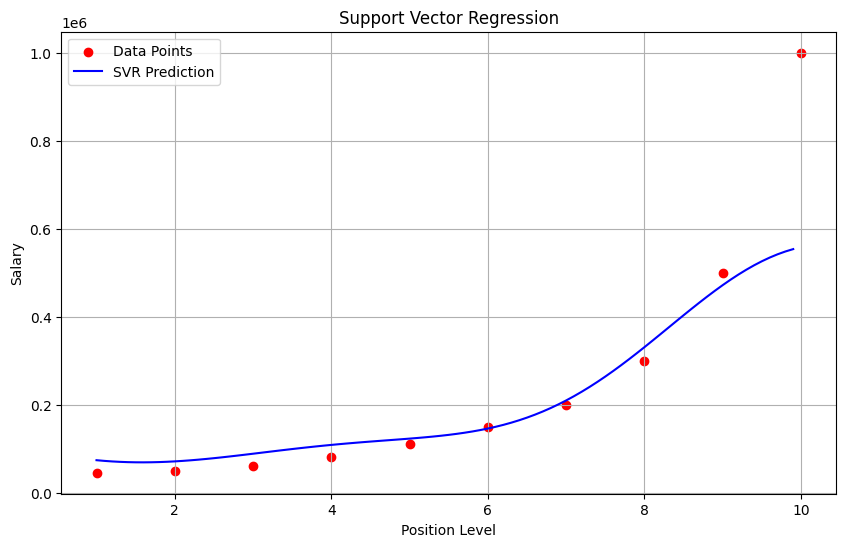

In [8]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='red', label='Data Points')

X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
X_grid_scaled = sc_X.transform(X_grid)
y_pred_scaled = regressor.predict(X_grid_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

plt.plot(X_grid, y_pred, color='blue', label='SVR Prediction')

plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16040\2897534532.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


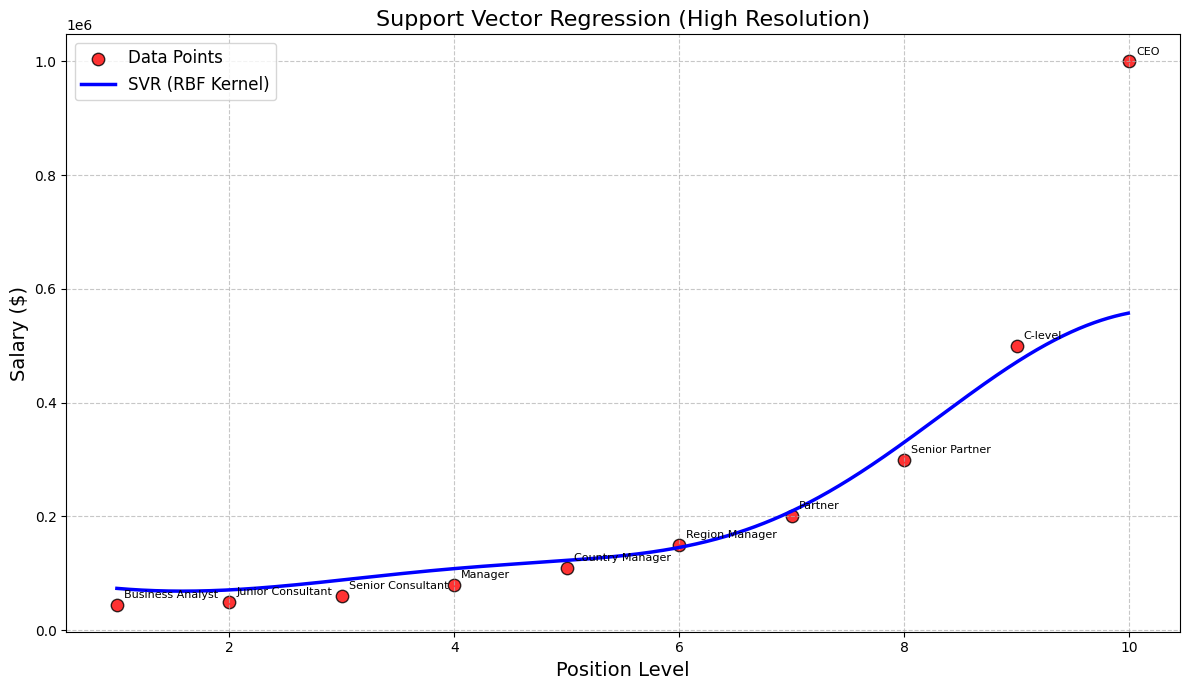

In [9]:
plt.figure(figsize=(12, 7))

plt.scatter(X, y, color='red', edgecolors='black', s=80, alpha=0.8, label='Data Points')

X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
X_grid_scaled = sc_X.transform(X_grid)
y_pred_scaled = regressor.predict(X_grid_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

plt.plot(X_grid, y_pred, color='blue', linewidth=2.5, label='SVR (RBF Kernel)')

plt.title('Support Vector Regression (High Resolution)', fontsize=16)
plt.xlabel('Position Level', fontsize=14)
plt.ylabel('Salary ($)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

for i, txt in enumerate(dataset['Position']):
    plt.annotate(txt, (X[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)
    
plt.tight_layout()
plt.show()